In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [11]:
# 1 Import data from medical_examination.csv and assign it to the df variable
df = pd.read_csv('medical_examination.csv')
df.head()

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [12]:
# 2
df['overweight'] = (df['weight'] / ((df['height'] / 100) ** 2)).apply(lambda x : 1 if x > 25 else 0)
df.head()

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,0
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,0


In [13]:
# 3 Normalize data by making 0 always good and 1 always bad.
# If the value of cholesterol or gluc is 1, set the value to 0. If the value is more than 1, set the value to 1
df['cholesterol'] = df['cholesterol'].apply(lambda x : 0 if x == 1 else 1)
df['gluc'] = df['gluc'].apply(lambda x : 0 if x == 1 else 1)
df.head()

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,0,0,0,0,1,0,0
1,1,20228,1,156,85.0,140,90,1,0,0,0,1,1,1
2,2,18857,1,165,64.0,130,70,1,0,0,0,0,1,0
3,3,17623,2,169,82.0,150,100,0,0,0,0,1,1,1
4,4,17474,1,156,56.0,100,60,0,0,0,0,0,0,0


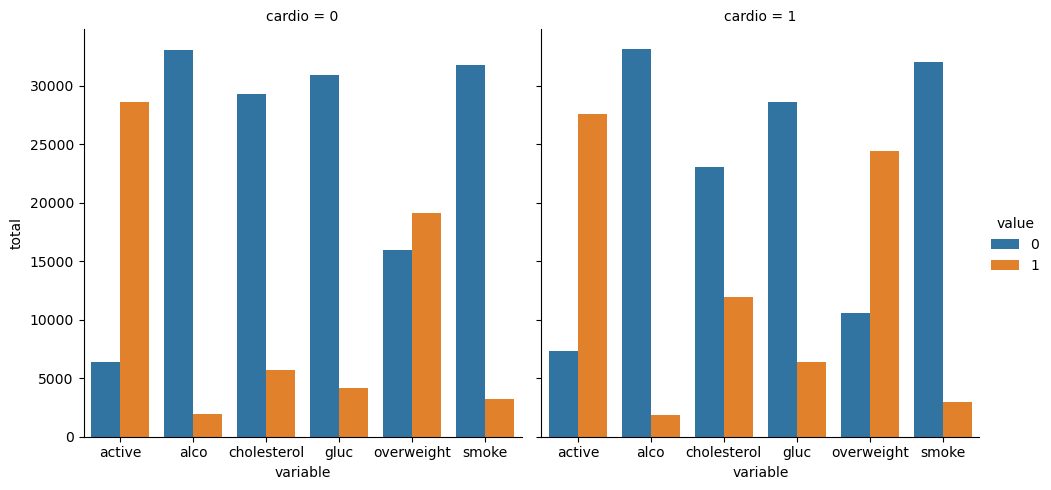

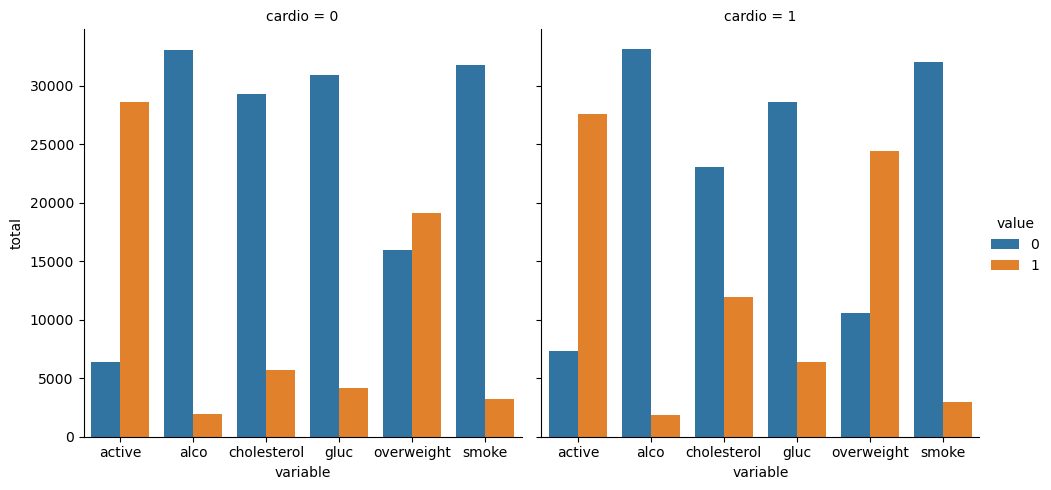

In [18]:
# 4
def draw_cat_plot():
    # 5
    df_cat = pd.melt(df, id_vars = ['cardio'], value_vars = ['cholesterol', 'gluc', 'smoke', 'alco', 'active', 'overweight'])


    # 6
    df_cat['total'] = 1
    df_cat = df_cat.groupby(['cardio', 'variable', 'value'], as_index = False).count()
    

    # Draw catplot with 'sns.catplot()'

    # 8
    fig = sns.catplot(x = 'variable', y = 'total', data = df_cat, hue = 'value', kind = 'bar', col = 'cardio').fig


    # 9
    fig.savefig('catplot.png')
    return fig

# draw_cat_plot()

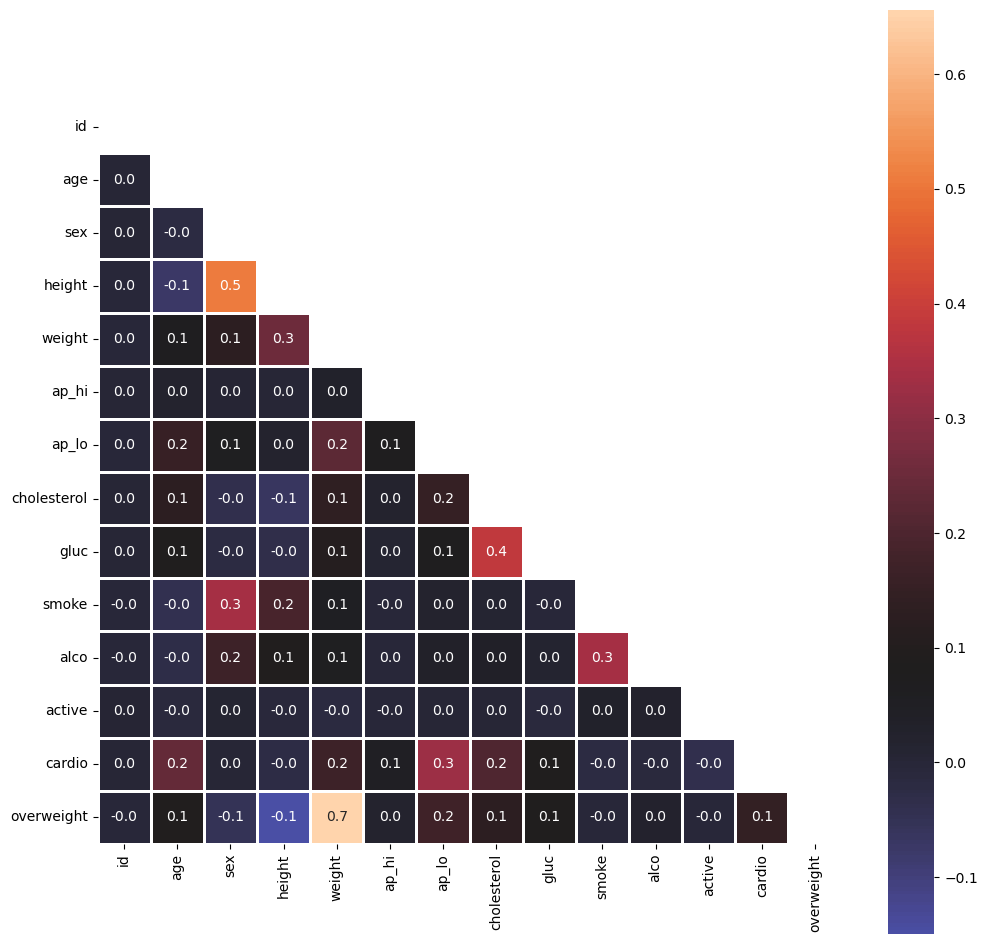

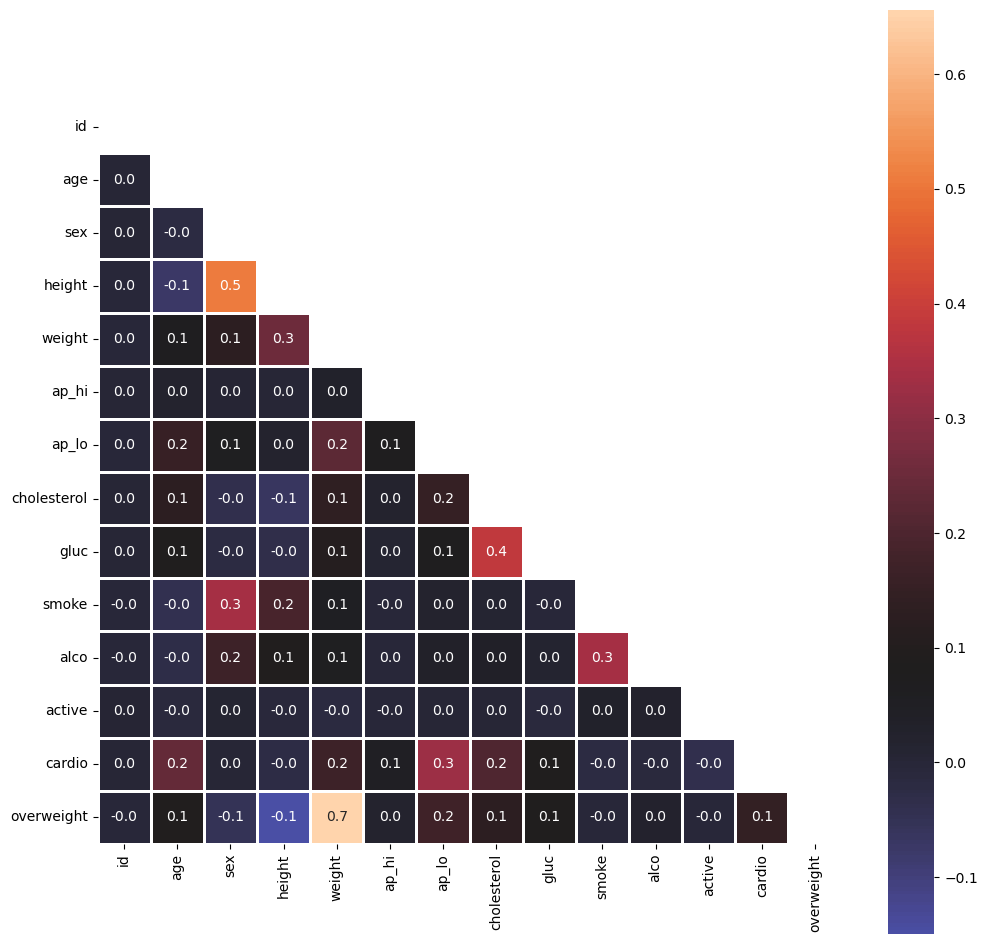

In [26]:
 # 10
def draw_heat_map():
    # 11
    df_heat = df[
    (df['ap_lo'] <= df['ap_hi']) &
    (df['height'] >= df['height'].quantile(0.025)) &
    (df['height'] <= df['height'].quantile(0.975)) &
    (df['weight'] >= df['weight'].quantile(0.025)) &
    (df['weight'] <= df['weight'].quantile(0.975))]

    # 12
    corr = df_heat.corr(method = 'pearson')

    # 13
    mask = np.triu(corr)



    # 14
    fig, ax = plt.subplots(figsize = (12, 12))

    # 15 Draw the heatmap with 'sns.heatmap()'
    sns.heatmap(corr, linewidths=1, annot = True, square = True, mask = mask, fmt = '.1f', center = 0.08)


    # 16
    fig.savefig('heatmap.png')
    return fig

# draw_heat_map()

In [15]:
# import pandas as pd
# import seaborn as sns
# import matplotlib.pyplot as plt
# import numpy as np

# # 1
# df = pd.read_csv('medical_examination.csv')
# print(df.head())

# # 2
# df['overweight'] = None

# # 3


# # 4
# def draw_cat_plot():
#     # 5
#     df_cat = None


#     # 6
#     df_cat = None
    

#     # 7



#     # 8
#     fig = None


#     # 9
#     fig.savefig('catplot.png')
#     return fig


# # 10
# def draw_heat_map():
#     # 11
#     df_heat = None

#     # 12
#     corr = None

#     # 13
#     mask = None



#     # 14
#     fig, ax = None

#     # 15



#     # 16
#     fig.savefig('heatmap.png')
#     return fig
